In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Question 4

In [2]:
#4

gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


# Question 5

In [3]:
#5

gdp_df.shape

(7176, 4)

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [5]:
type(gdp_df)

pandas.core.frame.DataFrame

This dataframe has 7176 rows and 4 columns. Country contains strings (or objects), Year is an integer, Value is a float, and Value Footnoes are also floats.

# Question 6

In [6]:
#6

gdp_drop = gdp_df.drop(columns = 'Value Footnotes')
# or gdp_df.drop(['Value Footnotes'], axis=1)
gdp_drop
# drop function has axis=0 as default (which refers to the rows not the columns)

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [7]:
gdp_drop.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df = gdp_drop

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


# Question 7

In [9]:
#7

year_count = gdp_df.Country.value_counts()

In [10]:
type(year_count)

pandas.core.series.Series

In [11]:
year_df = year_count.to_frame().reset_index()
year_df

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [12]:
year_df.columns = ['Country', 'Number_of_Years']
year_df

,Country,Number_of_Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [13]:
year_df[year_df.Number_of_Years == year_df.Number_of_Years.max()]
# countries that have data for all 31 years

,Country,Number_of_Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [14]:
year_df[year_df.Number_of_Years <= 10]
# countries with 10 or less years of data

,Country,Number_of_Years
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8
241,Djibouti,8


In [15]:
country_count = gdp_df.Year.value_counts()

In [16]:
country_df = country_count.to_frame()
country_df

,Year
2018,242
2017,242
2016,242
2015,242
2014,242
2013,242
2019,241
2020,240
2012,240
2011,240


In [17]:
country_df = country_df.reset_index()

In [18]:
country_df.columns = ['Year', 'Countries_Counted']
country_df.sort_values(by = 'Countries_Counted', ascending=False)

,Year,Countries_Counted
0,2018,242
2,2016,242
3,2015,242
4,2014,242
5,2013,242
1,2017,242
6,2019,241
7,2020,240
8,2012,240
9,2011,240


Over 200 countries have data for all 31 years (although some rows don't have country names, so it may be less than 200). Only 4 countries had 10 years or less of recorded data. When sorting the years by countries counted, the trend is that more countries were recorded every year until hitting a plateau in 2013, then decreasing slightly after 2018.

# Question 8

In [19]:
#8

gdp_2020 = gdp_df[gdp_df.Year == 2020]

In [20]:
gdp_2020 = gdp_2020.reset_index(drop = True).drop(columns = 'Year')
gdp_2020

,Country,GDP_Per_Capita
0,Afghanistan,1970.560169
1,Africa Eastern and Southern,3491.978104
2,Africa Western and Central,4021.293919
3,Albania,13253.733337
4,Algeria,10735.382539
...,...,...
235,Vietnam,10338.270543
236,West Bank and Gaza,5402.538773
237,World,16269.969854
238,Zambia,3277.816510


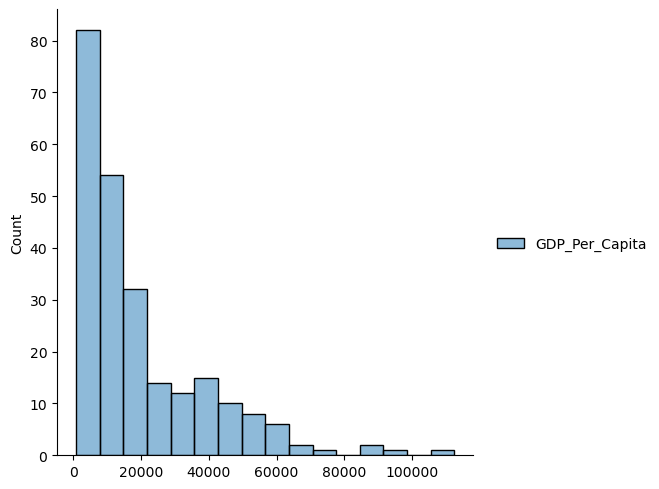

In [21]:
sns.displot(gdp_2020)

<Axes: ylabel='Density'>

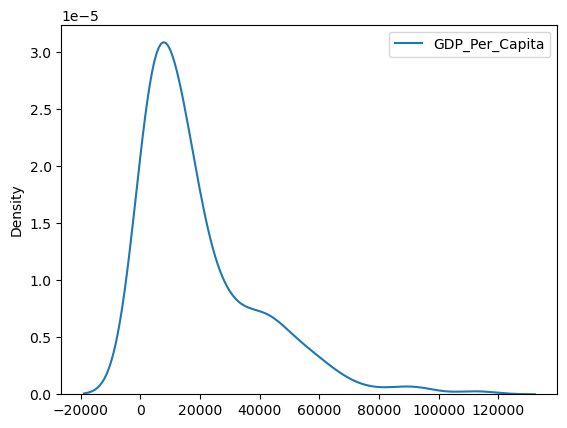

In [22]:
sns.kdeplot(gdp_2020)

<Axes: >

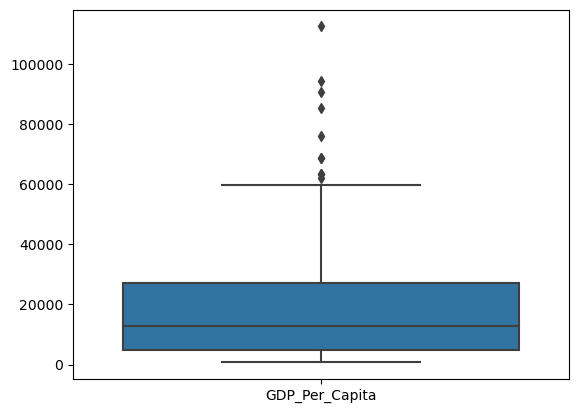

In [23]:
sns.boxplot(gdp_2020)

<Axes: >

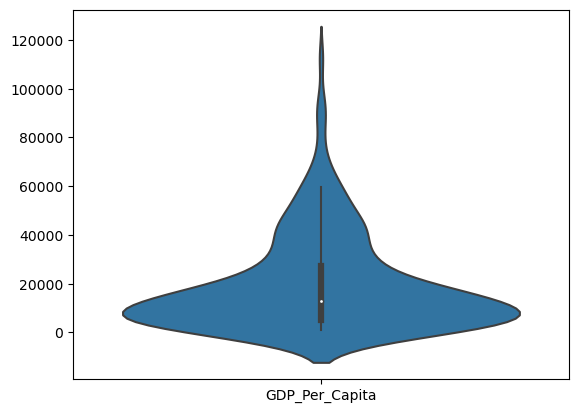

In [24]:
sns.violinplot(gdp_2020)

# Question 9

In [25]:
#9

round(np.median(gdp_2020.GDP_Per_Capita),2)

12908.94

$12,988.94 is the median GDP in 2020

# Question 10

In [26]:
#10

decades = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df.Year.isin(decades)] # .isin can be used to consolidate masks
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

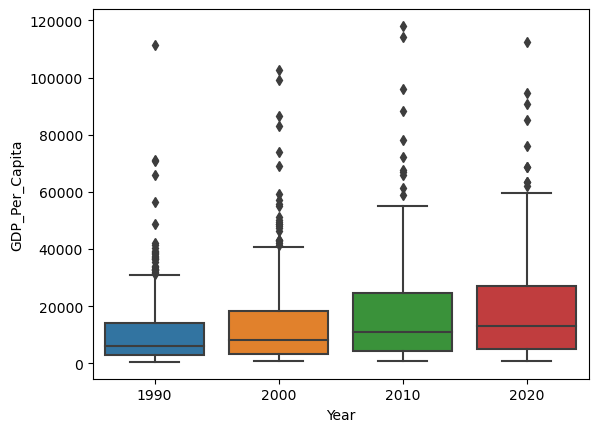

In [27]:
sns.boxplot(x = 'Year',
            y = 'GDP_Per_Capita',
            data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

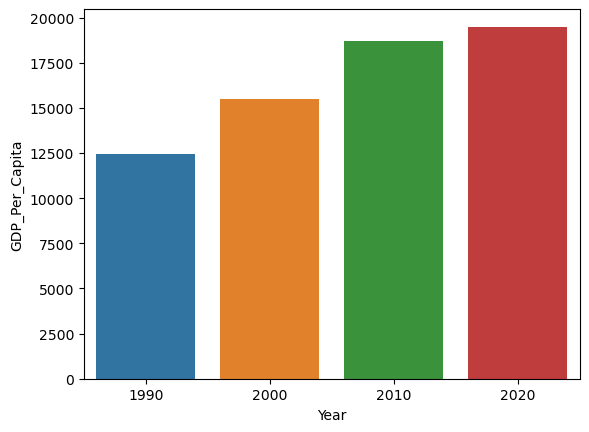

In [28]:
sns.barplot(x = 'Year',
            y = 'GDP_Per_Capita',
            data = gdp_decades,
            errorbar = None)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

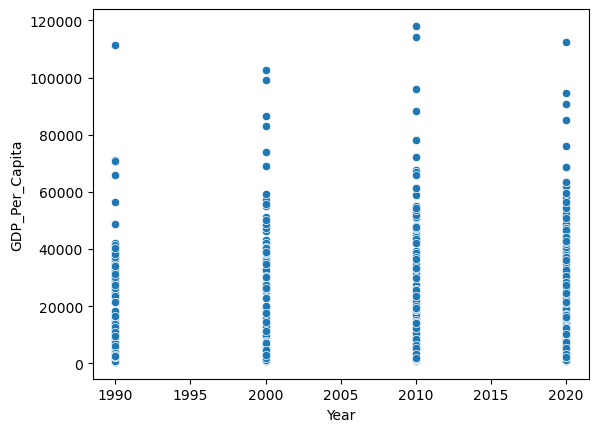

In [29]:
sns.scatterplot(x = 'Year',
                y = 'GDP_Per_Capita',
                data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

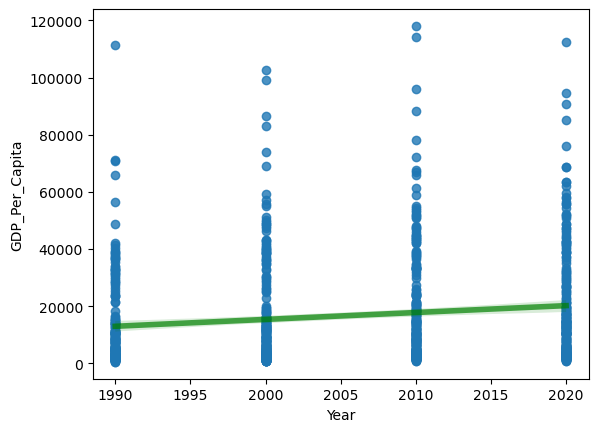

In [30]:
sns.regplot(x= 'Year', y = 'GDP_Per_Capita', data = gdp_decades, line_kws = {'color':'g', 'alpha': 0.7, 'lw':4})

Generally, the GDP increases over time. The maximum GDP every decade, however, varies. The bar chart is the most straightfoward, but doesn't show the outliers since it only shows average/median. The box chart gives a better of idea where the median is, but isn't as easy to interpret. The scatterplots show the outliers clearly, but everything else blurs together.

# Question 11

In [31]:
#11

gdp_chrono = gdp_df.sort_values(by = ['Year', 'Country'], ascending = True)
gdp_chrono = gdp_chrono.reset_index(drop = True)
gdp_chrono

,Country,Year,GDP_Per_Capita
0,Africa Eastern and Southern,1990,3083.976800
1,Africa Western and Central,1990,2810.341129
2,Albania,1990,4827.034551
3,Algeria,1990,8746.340762
4,Angola,1990,5758.950488
...,...,...,...
7171,Vietnam,2020,10338.270543
7172,West Bank and Gaza,2020,5402.538773
7173,World,2020,16269.969854
7174,Zambia,2020,3277.816510


In [32]:
first_6fig = gdp_chrono.loc[gdp_chrono.GDP_Per_Capita >= 100000]
first_6fig = first_6fig.reset_index(drop = True)
first_6fig.head(2)

,Country,Year,GDP_Per_Capita
0,United Arab Emirates,1990,111454.055665
1,United Arab Emirates,1991,106103.552655


The United Arab Emirates were the first to have a GDP per capita greater than $100,000.

# Question 12

In [33]:
#12

max_filter = (gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.max())
gdp_2020_max = gdp_2020.loc[max_filter]
round(gdp_2020_max,2)

,Country,GDP_Per_Capita
130,Luxembourg,112557.31


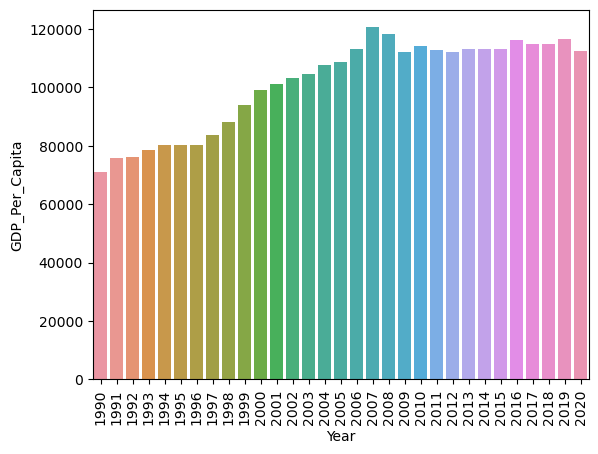

In [34]:
gdp_lux = gdp_df[gdp_df.Country == 'Luxembourg']
lux_graph = sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_lux)

var = lux_graph.set_xticklabels(lux_graph.get_xticklabels(), rotation=90) # this answer was found at:
# https://stackoverflow.com/questions/57165540/hide-text-before-seaborn-barplot

Luxembourg had the highest GDP per capita in 2020. However, 2020 was not their highest year in total.

# Question 13

In [35]:
#13

min_filter = (gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.min())
gdp_2020_min = gdp_2020.loc[min_filter]
gdp_2020_min

,Country,GDP_Per_Capita
30,Burundi,731.064074


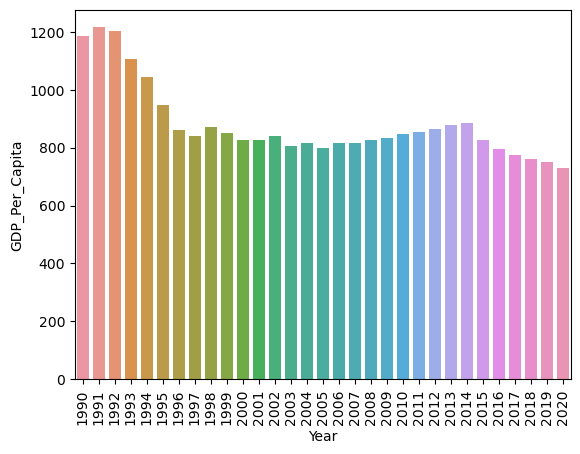

In [36]:
gdp_bur = gdp_df[gdp_df.Country == 'Burundi'].reset_index()
bur_graph = sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_bur)

var = bur_graph.set_xticklabels(bur_graph.get_xticklabels(), rotation=90)

Burundi had the lowest GP in 2020. Back in the early 90's, it was considerably higher.

# Question 13 Bonus

In [37]:
#13 Bonus

gdp_90 = gdp_df[gdp_df.Year == 1990].reset_index()
countries_90 = gdp_90.Country
countries_90

0      Africa Eastern and Southern
1       Africa Western and Central
2                          Albania
3                          Algeria
4                           Angola
                  ...             
201                        Vanuatu
202                        Vietnam
203                          World
204                         Zambia
205                       Zimbabwe
Name: Country, Length: 206, dtype: object

In [38]:
gdp_90_20 = gdp_df[gdp_df.Country.isin(countries_90) & gdp_df.Year.isin([1990,2020])].reset_index(drop = True)
gdp_90_20

,Country,Year,GDP_Per_Capita
0,Africa Eastern and Southern,2020,3491.978104
1,Africa Eastern and Southern,1990,3083.976800
2,Africa Western and Central,2020,4021.293919
3,Africa Western and Central,1990,2810.341129
4,Albania,2020,13253.733337
...,...,...,...
406,World,1990,9704.621768
407,Zambia,2020,3277.816510
408,Zambia,1990,2190.181724
409,Zimbabwe,2020,2134.555461


In [39]:
v = gdp_90_20.Country.value_counts()
gdp_90_20 = gdp_90_20[gdp_90_20.Country.isin(v.index[v.gt(1)])].reset_index(drop = True) # answer found on stack overflow
# https://stackoverflow.com/questions/48628417/how-to-select-rows-in-pandas-dataframe-where-value-appears-more-than-once
gdp_90_20

,Country,Year,GDP_Per_Capita
0,Africa Eastern and Southern,2020,3491.978104
1,Africa Eastern and Southern,1990,3083.976800
2,Africa Western and Central,2020,4021.293919
3,Africa Western and Central,1990,2810.341129
4,Albania,2020,13253.733337
...,...,...,...
405,World,1990,9704.621768
406,Zambia,2020,3277.816510
407,Zambia,1990,2190.181724
408,Zimbabwe,2020,2134.555461


In [40]:
# now, we look at group by
gdp_diff = gdp_90_20.drop(columns = 'Year').groupby(['Country']).diff().fillna(0)
gdp_diff

,GDP_Per_Capita
0,0.000000
1,-408.001305
2,0.000000
3,-1210.952790
4,0.000000
...,...
405,-6565.348086
406,0.000000
407,-1087.634786
408,0.000000


In [41]:
gdp_90_20['GDP_diff'] = gdp_diff.GDP_Per_Capita
gdp_90_20

,Country,Year,GDP_Per_Capita,GDP_diff
0,Africa Eastern and Southern,2020,3491.978104,0.000000
1,Africa Eastern and Southern,1990,3083.976800,-408.001305
2,Africa Western and Central,2020,4021.293919,0.000000
3,Africa Western and Central,1990,2810.341129,-1210.952790
4,Albania,2020,13253.733337,0.000000
...,...,...,...,...
405,World,1990,9704.621768,-6565.348086
406,Zambia,2020,3277.816510,0.000000
407,Zambia,1990,2190.181724,-1087.634786
408,Zimbabwe,2020,2134.555461,0.000000


In [42]:
gdp_diff = gdp_90_20.loc[gdp_90_20.GDP_diff != 0].drop(columns = ['Year', 'GDP_Per_Capita'])
gdp_diff

,Country,GDP_diff
1,Africa Eastern and Southern,-408.001305
3,Africa Western and Central,-1210.952790
5,Albania,-8426.698787
7,Algeria,-1989.041777
9,Angola,-383.013352
...,...,...
401,Vanuatu,-22.920691
403,Vietnam,-8271.898328
405,World,-6565.348086
407,Zambia,-1087.634786


In [43]:
gdp_diff.loc[gdp_diff.GDP_diff < 0].reset_index(drop = True)

,Country,GDP_diff
0,Africa Eastern and Southern,-408.001305
1,Africa Western and Central,-1210.952790
2,Albania,-8426.698787
3,Algeria,-1989.041777
4,Angola,-383.013352
...,...,...
178,Uzbekistan,-3705.343486
179,Vanuatu,-22.920691
180,Vietnam,-8271.898328
181,World,-6565.348086


In [44]:
gdp_diff.loc[gdp_diff.GDP_diff > 0].reset_index(drop = True)

,Country,GDP_diff
0,Aruba,3025.261617
1,Barbados,669.342587
2,Brunei,9031.907387
3,Burundi,453.777958
4,Central African Republic,263.818195
5,Comoros,76.915329
6,Congo,1570.721495
7,Dem. Rep. Congo,737.278073
8,Fragile and conflict affected situations,424.018293
9,Gabon,3858.325356


From the two dataframes above, there are many more countries that had a lower GDP in 2020 than in 1990 (183 compared to 21). From this, it's clear that it's not a general fact that countries don't have a higher GDP just because more time has passed.

# Question 14

In [45]:
#14

internet = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', nrows = 4495,
                       dtype = {'Country or Area':object, 'Year':int, 'Value':float, 'Value Footnotes':object})
internet

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [46]:
internet.dtypes

Country or Area     object
Year                 int32
Value              float64
Value Footnotes     object
dtype: object

# Question 15

In [47]:
#15

internet = internet.drop(columns = 'Value Footnotes')

In [48]:
internet.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# Question 16

In [49]:
#16

internet_years = internet.Year.value_counts()
internet_years

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

While the 2000's have more consistent internet usage among countries, 1990 was the peak in terms of countries using internet.

# Question 17

In [50]:
#17

int_chrono = internet.sort_values('Year', ascending = True).reset_index(drop = True)
int_chrono = int_chrono[int_chrono.Internet_Users_Pct > 0].reset_index(drop = True)
int_chrono.head(1)

,Country,Year,Internet_Users_Pct
0,United Kingdom,1990,0.087355


1990 was the first year where the was a non-zero percent in internet users.

# Question 18

In [51]:
#18

int_diff = internet.loc[internet.Year.isin([2000,2014])]
int_diff

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

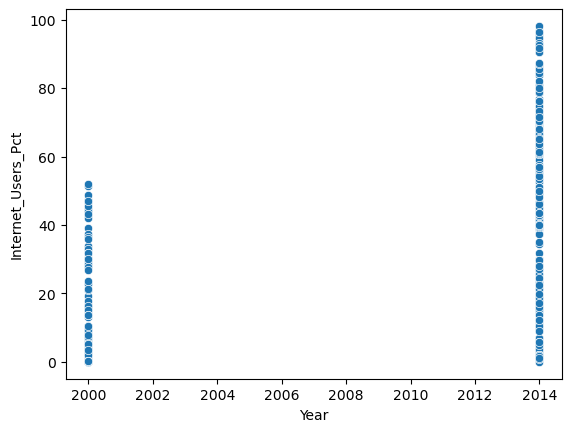

In [52]:
sns.scatterplot(x = 'Year', y = 'Internet_Users_Pct', data = int_diff)

Generally, more countries were using the internet and the percentage for each country was larger in 2014.

# Question 19

In [53]:
#19

below_5 = internet.loc[(internet.Year == 2014) & (internet.Internet_Users_Pct < 5)].reset_index(drop = True)
below_5

,Country,Year,Internet_Users_Pct
0,Burundi,2014,1.38
1,Central African Rep.,2014,4.03
2,Chad,2014,2.50
3,Congo (Democratic Republic of the),2014,3.00
4,Dem. People's Rep. of Korea,2014,0.00
5,Eritrea,2014,0.99
6,Ethiopia,2014,2.90
7,Guinea,2014,1.72
8,Guinea-Bissau,2014,3.32
9,Madagascar,2014,3.70


16 countries had a percentage less than 5% in 2014.

# Question 20

In [54]:
#20

gdp_and_internet_use = pd.concat([gdp_df, internet])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
4490,Zimbabwe,1997,NaN,0.033080
4491,Zimbabwe,1996,NaN,0.016790
4492,Zimbabwe,1995,NaN,0.007684
4493,Zimbabwe,1994,NaN,0.001739


# Question 21

In [55]:
#21

top_int = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014].reset_index(drop = True)
top_int = top_int.sort_values('Internet_Users_Pct', ascending = False)
top_int = top_int.head(3).reset_index(drop = True)
top_int

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Iceland,2014,NaN,98.16
1,Bermuda,2014,NaN,96.80
2,Norway,2014,NaN,96.30


In [56]:
gdp_top_int = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top_int.Country) & 
                                      (gdp_and_internet_use.GDP_Per_Capita > 0)] # gives only gdp column
                                      #(gdp_and_internet_use.Year.isin([1990,2000,2010,2020]))]
gdp_top_int = gdp_top_int.reset_index(drop = True)
gdp_top_int

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Bermuda,2020,76105.138057,NaN
1,Bermuda,2019,81681.726668,NaN
2,Bermuda,2018,81423.408453,NaN
3,Bermuda,2017,81834.955874,NaN
4,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
83,Norway,1994,47541.766710,NaN
84,Norway,1993,45512.390217,NaN
85,Norway,1992,44517.435716,NaN
86,Norway,1991,43229.916320,NaN


C:\Users\jclug\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


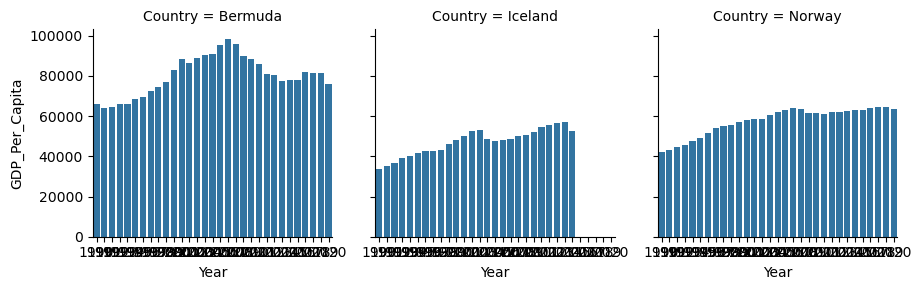

In [57]:
graph = sns.FacetGrid(gdp_top_int, col = 'Country', col_wrap = 4) #, sharey = False)
graph.map(sns.barplot, 'Year', 'GDP_Per_Capita')

There is a small peak for all of them in the late 2000's, then followed by a small dip, then a small increase.

# Question 22

In [58]:
#22

gdp_and_internet_use_2014 = pd.merge(gdp_df, internet, on = ['Country', 'Year'], how = 'inner')
gdp_and_internet_use_2014 = gdp_and_internet_use_2014[gdp_and_internet_use_2014.Year == 2014].reset_index(drop = True)
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.384604,6.39
1,Albania,2014,11586.833878,60.10
2,Algeria,2014,11512.690472,18.09
3,Angola,2014,8240.347981,21.26
4,Antigua and Barbuda,2014,18104.683788,64.00
...,...,...,...,...
158,Uruguay,2014,22419.043746,61.46
159,Uzbekistan,2014,6075.192224,43.55
160,Vanuatu,2014,2984.243485,18.80
161,Zambia,2014,3450.037600,17.34


# Question 23

(0.0, 100.0)

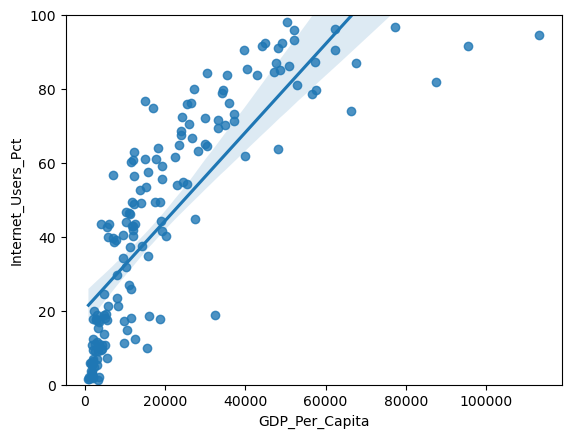

In [59]:
#23

sns.regplot(x = gdp_and_internet_use_2014['GDP_Per_Capita'], y = gdp_and_internet_use_2014['Internet_Users_Pct'])
plt.ylim([0,100])

In [60]:
gdp_int_14 = gdp_and_internet_use_2014
outlier1 = gdp_int_14.loc[(gdp_int_14.GDP_Per_Capita > 30000) & (gdp_int_14.Internet_Users_Pct < 22)]
outlier1

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
47,Equatorial Guinea,2014,32436.553501,18.86


Equatorial Guinea has the highest GDP for countries that have less than 20% internet users.

In [61]:
outlier2 = gdp_int_14.loc[(gdp_int_14.GDP_Per_Capita > 80000)]
outlier2

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
86,Luxembourg,2014,113313.578898,94.67
121,Qatar,2014,95578.261511,91.49
131,Singapore,2014,87616.637527,82.00


Luxembourg, Qatar, and Singapore all have the highest GDP's in 2014. However, most other countries that have 80% or more in internet users have a GDP of 40,000 - 50,000, not over 80,000.

In [62]:
outlier3 = gdp_int_14.loc[(gdp_int_14.GDP_Per_Capita < 25000) & (gdp_int_14.Internet_Users_Pct < 20)]
outlier3.sort_values('GDP_Per_Capita', ascending = True).head(10)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
26,Burundi,2014,886.235296,1.38
135,Somalia,2014,917.876549,1.63
108,Niger,2014,1126.805440,1.95
101,Mozambique,2014,1217.088867,5.94
88,Malawi,2014,1457.473020,5.83
87,Madagascar,2014,1540.744961,3.70
49,Ethiopia,2014,1656.634489,2.90
83,Liberia,2014,1673.055864,5.41
61,Guinea-Bissau,2014,1740.896737,3.32
124,Rwanda,2014,1780.144699,10.60


These 10 countries had the lowest GDP's and had very low internet users percentages. These do not fit into the average line projected by the scatter plot.

# Question 24

In [63]:
#24

gdp_cate = pd.qcut(gdp_int_14.GDP_Per_Capita, 3, labels = ['Low', 'Medium', 'High'])
gdp_cate

0         Low
1      Medium
2      Medium
3      Medium
4      Medium
        ...  
158    Medium
159       Low
160       Low
161       Low
162       Low
Name: GDP_Per_Capita, Length: 163, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [64]:
gdp_cate = gdp_cate.to_frame()
gdp_cate.columns = ['GDP_group']
gdp_cate

,GDP_group
0,Low
1,Medium
2,Medium
3,Medium
4,Medium
...,...
158,Medium
159,Low
160,Low
161,Low


In [65]:
gdp_int_cate = pd.merge(gdp_int_14, gdp_cate, left_index = True, right_index = True)
#gdp_int_cate.columns = ['Country', 'Year', 'GDP_Per_Capita', 'Internet_Users_Pct', 'GDP_group']
gdp_int_cate

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
0,Afghanistan,2014,2102.384604,6.39,Low
1,Albania,2014,11586.833878,60.10,Medium
2,Algeria,2014,11512.690472,18.09,Medium
3,Angola,2014,8240.347981,21.26,Medium
4,Antigua and Barbuda,2014,18104.683788,64.00,Medium
...,...,...,...,...,...
158,Uruguay,2014,22419.043746,61.46,Medium
159,Uzbekistan,2014,6075.192224,43.55,Low
160,Vanuatu,2014,2984.243485,18.80,Low
161,Zambia,2014,3450.037600,17.34,Low


# Question 25

In [66]:
#25

median_low = np.median((gdp_int_cate[gdp_int_cate.GDP_group == 'Low']).Internet_Users_Pct)
median_med = np.median((gdp_int_cate[gdp_int_cate.GDP_group == 'Medium']).Internet_Users_Pct)
median_high = np.median((gdp_int_cate[gdp_int_cate.GDP_group == 'High']).Internet_Users_Pct)
print('Low:',median_low, '\tMedium:',median_med, '\tHigh:',median_high)

Low: 10.7 	Medium: 43.7 	High: 79.69999999999999


The higher the GDP for the country, the higher the internet users percentage. Essentially, there is a positive correlation between the GDP and amount of people using the internet in a country.

# Question 26 and Beyond

In [67]:
dollar_day = pd.read_csv('../data/dollar_per_day.csv')

In [68]:
gdp_int = pd.merge(gdp_df, internet, on = ['Country', 'Year'], how = 'outer')
gdp_int

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


In [69]:
dollar_day = dollar_day.drop(columns = 'Value Footnotes')

In [70]:
dollar_day.columns = ['Country', 'Year', 'Pop_with_$1']
dollar_day

,Country,Year,Pop_with_$1
0,Albania,2008,0.62
1,Albania,2005,0.85
2,Albania,2004,0.53
3,Albania,2002,0.57
4,Albania,1997,0.20
...,...,...,...
852,Zambia,2003,64.60
853,Zambia,1998,55.67
854,Zambia,1996,62.07
855,Zambia,1993,65.27


# Joining Data into 1 Dataframe

In [71]:
country_df = pd.merge(gdp_int, dollar_day, on = ['Country', 'Year'], how = 'outer')
country_df

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
0,Afghanistan,2020,1970.560169,NaN,NaN
1,Afghanistan,2019,2065.036235,NaN,NaN
2,Afghanistan,2018,2033.804389,NaN,NaN
3,Afghanistan,2017,2058.400221,NaN,NaN
4,Afghanistan,2016,2057.067978,NaN,NaN
...,...,...,...,...,...
8410,Uruguay,1981,NaN,NaN,0.00
8411,Venezuela,1989,NaN,NaN,6.31
8412,Venezuela,1987,NaN,NaN,3.13
8413,Venezuela,1981,NaN,NaN,3.27


In [72]:
country_df.loc[country_df.Country == 'Venezuela']

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
8170,Venezuela,2014,NaN,57.000000,NaN
8171,Venezuela,2013,NaN,54.900000,NaN
8172,Venezuela,2012,NaN,49.050083,NaN
8173,Venezuela,2011,NaN,40.220000,NaN
8174,Venezuela,2010,NaN,37.370000,NaN
8175,Venezuela,2009,NaN,32.700000,NaN
8176,Venezuela,2008,NaN,25.880000,NaN
8177,Venezuela,2007,NaN,20.830000,NaN
8178,Venezuela,2006,NaN,15.224711,6.63
8179,Venezuela,2005,NaN,12.552998,13.44


In [73]:
gdp_df.loc[gdp_df.Country == 'Venezuela']

,Country,Year,GDP_Per_Capita


In [74]:
country_df = country_df.sort_values(['Country', 'Year']).reset_index(drop = True)
country_df

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
0,Afghanistan,1990,NaN,0.000000,NaN
1,Afghanistan,2001,NaN,0.004723,NaN
2,Afghanistan,2002,1189.784668,0.004561,NaN
3,Afghanistan,2003,1235.810063,0.087891,NaN
4,Afghanistan,2004,1200.278013,0.105809,NaN
...,...,...,...,...,...
8410,Zimbabwe,2016,2341.304920,NaN,NaN
8411,Zimbabwe,2017,2416.049969,NaN,NaN
8412,Zimbabwe,2018,2497.136618,NaN,NaN
8413,Zimbabwe,2019,2310.634802,NaN,NaN


In [75]:
country_df.sort_values('Pop_with_$1', ascending = False).loc[country_df['Pop_with_$1'] > 0]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
3006,Guinea,1991,1503.801165,NaN,92.55
1829,Democratic Republic of the Congo,2006,NaN,NaN,87.72
1040,Burundi,1998,870.043821,0.015843,86.43
4817,Mali,1994,1483.067953,NaN,86.08
4667,Madagascar,1980,NaN,NaN,85.89
...,...,...,...,...,...
7941,Ukraine,2010,12221.440430,23.300000,0.02
3854,Kazakhstan,1988,NaN,NaN,0.02
6733,Slovenia,1998,24151.538983,10.104603,0.02
6726,Slovenia,1987,NaN,NaN,0.02


In [76]:
country_avg = country_df.drop(columns = 'Year').groupby(['Country']).mean()
country_avg

,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
Country,,,
Afghanistan,1754.808715,2.504587,NaN
Africa Eastern and Southern,3248.216145,NaN,NaN
Africa Western and Central,3333.479389,NaN,NaN
Albania,8262.388955,17.436507,0.55400
Algeria,9922.395135,5.917834,7.17500
...,...,...,...
West Bank and Gaza,5068.048362,NaN,NaN
World,12741.328561,NaN,NaN
Yemen,NaN,5.684079,15.20500


In [77]:
country_avg.sort_values('Pop_with_$1', ascending = False).loc[country_avg['Pop_with_$1'] > 0].head(20)

,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
Country,,,
Democratic Republic of the Congo,NaN,NaN,87.720000
Burundi,880.285796,0.245009,83.996667
Liberia,1505.911121,1.132847,83.760000
Madagascar,1585.521165,0.983085,76.885714
United Republic of Tanzania,NaN,NaN,75.010000
Malawi,1218.045082,1.347806,72.856667
Mozambique,853.773152,1.661298,71.620000
Central African Republic,1043.699159,NaN,69.470000
Rwanda,1306.984325,3.103200,68.290000


In [78]:
dollar_year = dollar_day.drop(columns = 'Country').groupby(['Year']).mean().reset_index()
dollar_year

,Year,Pop_with_$1
0,1978,65.890000
1,1979,7.980000
2,1980,50.670000
3,1981,24.038333
4,1982,39.940000
5,1983,36.080000
6,1984,37.390000
7,1985,26.495556
8,1986,19.664545
9,1987,20.901111


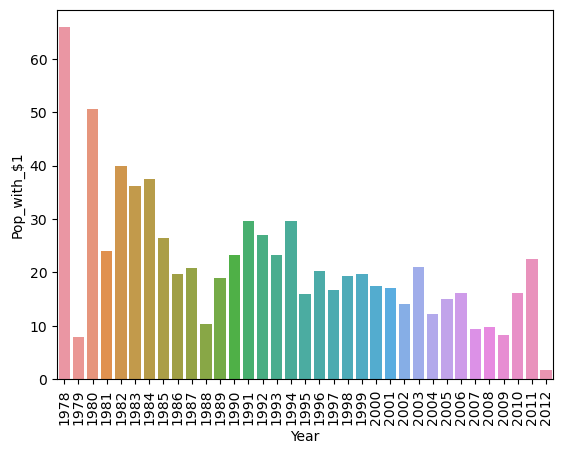

In [79]:
pop_graph = sns.barplot(data = dollar_year, x = 'Year', y = 'Pop_with_$1')
var = pop_graph.set_xticklabels(pop_graph.get_xticklabels(), rotation=90)

In [80]:
money = country_df.drop(columns = 'Internet_Users_Pct')
money

,Country,Year,GDP_Per_Capita,Pop_with_$1
0,Afghanistan,1990,NaN,NaN
1,Afghanistan,2001,NaN,NaN
2,Afghanistan,2002,1189.784668,NaN
3,Afghanistan,2003,1235.810063,NaN
4,Afghanistan,2004,1200.278013,NaN
...,...,...,...,...
8410,Zimbabwe,2016,2341.304920,NaN
8411,Zimbabwe,2017,2416.049969,NaN
8412,Zimbabwe,2018,2497.136618,NaN
8413,Zimbabwe,2019,2310.634802,NaN


In [81]:
country_money = money.drop(columns = 'Year').groupby('Country').mean().reset_index()
country_money

,Country,GDP_Per_Capita,Pop_with_$1
0,Afghanistan,1754.808715,NaN
1,Africa Eastern and Southern,3248.216145,NaN
2,Africa Western and Central,3333.479389,NaN
3,Albania,8262.388955,0.55400
4,Algeria,9922.395135,7.17500
...,...,...,...
292,West Bank and Gaza,5068.048362,NaN
293,World,12741.328561,NaN
294,Yemen,NaN,15.20500
295,Zambia,2614.240200,64.48875


In [82]:
year_money = money.drop(columns = 'Country').groupby('Year').mean().dropna(how = 'any').reset_index()
year_money

,Year,GDP_Per_Capita,Pop_with_$1
0,1990,12465.941628,23.205833
1,1991,12468.820992,29.545000
2,1992,12504.873390,27.012903
3,1993,12490.242772,23.317187
4,1994,12570.611281,29.584000
5,1995,13159.490610,15.868462
6,1996,13454.317203,20.271111
7,1997,14149.618724,16.749565
8,1998,14383.108280,19.268409
9,1999,14715.667013,19.612000


<Axes: xlabel='Pop_with_$1', ylabel='GDP_Per_Capita'>

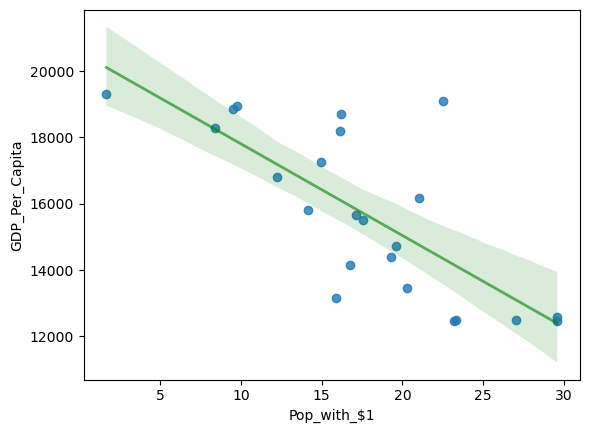

In [83]:
sns.regplot(data = year_money, y = 'GDP_Per_Capita', x = 'Pop_with_$1', line_kws = {'color':'g', 'alpha':.6, 'lw':2})

In [84]:
year_money.loc[(year_money['GDP_Per_Capita'] > 18000) & (year_money['Pop_with_$1'] > 20)]

,Year,GDP_Per_Capita,Pop_with_$1
21,2011,19101.654995,22.513166


<Axes: xlabel='Pop_with_$1', ylabel='GDP_Per_Capita'>

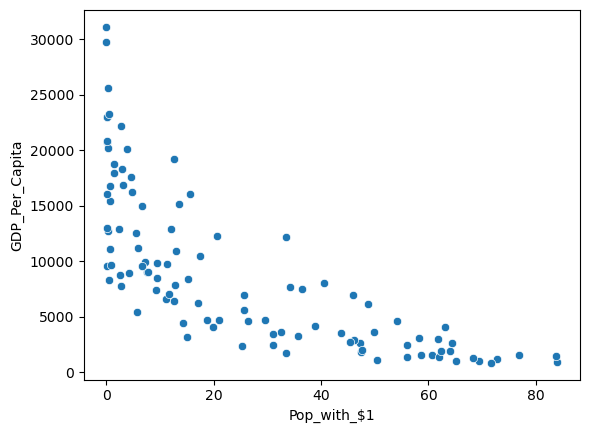

In [85]:
sns.scatterplot(data = country_money, x = 'Pop_with_$1', y = 'GDP_Per_Capita')#, line_kws = {'color':'r', 'alpha':.4, 'lw':3})

# Correlation Between GDP and \$1 Population
There is a general correlation between lower population with \\$1 and higher GDP. However, 2011 is a clear outlier in this instance because there was both a higher GDP and higher population with \$1. In terms of countries, however, the trend is much more clear (with a few outliers because the avg function is linear and not a polynomial).

In [86]:
int_pop = pd.merge(internet, dollar_day, on = ['Country', 'Year'], how = 'outer')
int_pop = int_pop.dropna()
int_pop

,Country,Year,Internet_Users_Pct,Pop_with_$1
21,Albania,2008,23.860000,0.62
24,Albania,2005,6.043891,0.85
25,Albania,2004,2.420388,0.53
27,Albania,2002,0.390081,0.57
32,Albania,1997,0.048594,0.20
...,...,...,...,...
4459,Zambia,2006,4.159913,68.51
4461,Zambia,2004,2.013550,64.29
4462,Zambia,2003,0.980483,64.60
4467,Zambia,1998,0.030226,55.67


In [87]:
int_pop.value_counts('Country').head(30)

Country
Argentina      19
Costa Rica     19
Brazil         17
Poland         16
Peru           15
Honduras       15
Uruguay        15
Georgia        14
Romania        14
Thailand       14
Colombia       13
Paraguay       13
China          12
Ecuador        12
Ukraine        12
El Salvador    12
Mexico         11
Panama         11
Indonesia      11
Armenia        11
Belarus        11
Kyrgyzstan     10
Turkey         10
Venezuela      10
Chile           9
Kazakhstan      9
Latvia          9
Bolivia         9
Hungary         8
Estonia         8
dtype: int64

<Axes: xlabel='Internet_Users_Pct', ylabel='Pop_with_$1'>

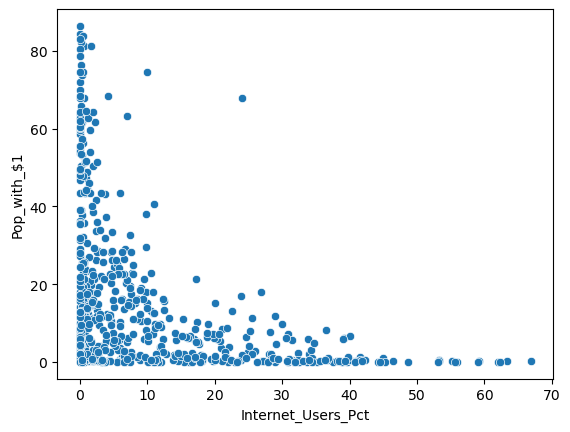

In [88]:
sns.scatterplot(data = int_pop, x = 'Internet_Users_Pct', y = 'Pop_with_$1')

In [89]:
int_pop.loc[(int_pop['Pop_with_$1'] > 60) & (int_pop.Internet_Users_Pct > 20)]

,Country,Year,Internet_Users_Pct,Pop_with_$1
2999,Nigeria,2010,24.0,67.98


#  Correlation Between $1 Population and Internet Users

The correlation between these two values closely resembles the function f(x) = 1/x

This means that the two are inversely related (but not in a linear fashion).

The data from Nigeria in 2010 is an outlier, since it had a high population with $1 and a fairly high percentage of people using the internet.
It should be noted that the internet percentage in this data does not surpass 70%.

# Making a function, just for fun

In [91]:
def Group_By(data, group):
    if group == 'Year':
        output = data.groupby(group).mean(['numeric_only']).reset_index()
    else:
        output = data.drop(columns = 'Year').groupby(group).mean(['numeric_only']).reset_index()
    return output

In [92]:
Group_By(country_df, 'Pop_with_$1')

,Pop_with_$1,GDP_Per_Capita,Internet_Users_Pct
0,0.00,16486.998714,26.748962
1,0.02,14559.428774,16.702301
2,0.03,12080.911597,0.230960
3,0.04,12080.437940,19.460000
4,0.05,21012.543768,38.404989
...,...,...,...
670,85.89,NaN,NaN
671,86.08,1483.067953,NaN
672,86.43,870.043821,0.015843
673,87.72,NaN,NaN


In [93]:
Group_By(country_df, 'Country')

,Country,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1
0,Afghanistan,1754.808715,2.504587,NaN
1,Africa Eastern and Southern,3248.216145,NaN,NaN
2,Africa Western and Central,3333.479389,NaN,NaN
3,Albania,8262.388955,17.436507,0.55400
4,Algeria,9922.395135,5.917834,7.17500
...,...,...,...,...
292,West Bank and Gaza,5068.048362,NaN,NaN
293,World,12741.328561,NaN,NaN
294,Yemen,NaN,5.684079,15.20500
295,Zambia,2614.240200,4.343504,64.48875


In [96]:
year_group = Group_By(country_df, 'Year')

In [97]:
pop_1_cate = pd.qcut(year_group['Pop_with_$1'], 4, labels = ['Very Low', 'Low', 'Medium', 'High'])
pop_1_cate

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6         High
7     Very Low
8         High
9       Medium
10        High
11        High
12        High
13        High
14      Medium
15      Medium
16    Very Low
17         Low
18      Medium
19        High
20        High
21      Medium
22        High
23         Low
24      Medium
25         Low
26         Low
27         Low
28         Low
29         Low
30    Very Low
31      Medium
32    Very Low
33    Very Low
34         Low
35    Very Low
36    Very Low
37    Very Low
38         Low
39      Medium
40    Very Low
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
Name: Pop_with_$1, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'Medium' < 'High']

In [98]:
year_group['$1_Pop_Category'] = pop_1_cate
year_group

,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1,$1_Pop_Category
0,1960,NaN,0.000000,NaN,NaN
1,1965,NaN,0.000000,NaN,NaN
2,1970,NaN,0.000000,NaN,NaN
3,1975,NaN,0.000000,NaN,NaN
4,1976,NaN,0.000000,NaN,NaN
5,1977,NaN,0.000000,NaN,NaN
6,1978,NaN,0.000000,65.890000,High
7,1979,NaN,0.000000,7.980000,Very Low
8,1980,NaN,0.000000,50.670000,High
9,1981,NaN,0.000000,24.038333,Medium


In [100]:
year_group.loc[year_group['$1_Pop_Category'] == 'High'].reset_index(drop = True)

,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_with_$1,$1_Pop_Category
0,1978,NaN,0.000000,65.890000,High
1,1980,NaN,0.000000,50.670000,High
2,1982,NaN,0.000000,39.940000,High
3,1983,NaN,0.000000,36.080000,High
4,1984,NaN,0.000000,37.390000,High
5,1985,NaN,0.000000,26.495556,High
6,1991,12468.820992,0.280305,29.545000,High
7,1992,12504.873390,0.399037,27.012903,High
8,1994,12570.611281,0.665616,29.584000,High


# Group By Results

This last table shows us which years had the highest amounts of population living off of $1 or less every day. The 80's and early 90's had the most, with the highest numbers being with the earliest years and generally decreasing as time went on.